In [1]:
import cv2
import pyttsx3
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir('..//')
%pwd

'c:\\Users\\Admin\\OneDrive\\Desktop\\projects\\object detection'

In [6]:
config_file = "resources/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "resources/frozen_inference_graph.pb"

In [7]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [8]:
ClassNames = []
file_name = "Labels.txt"
with open(file_name, 'rt') as fpt:
    ClassNames = fpt.read().rstrip('\n').split('\n')
    
print(ClassNames)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [9]:
print(len(ClassNames))

91


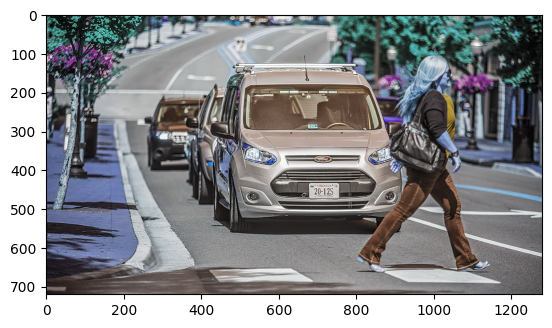

In [10]:
img = cv2.imread('demo_image.jpg')
plt.imshow(img)

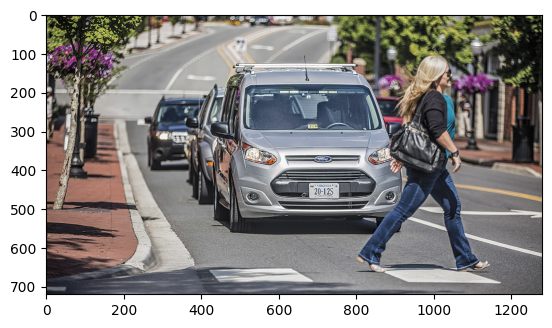

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002462026FA90>

In [13]:
classIds, confs, bbox = model.detect(img, confThreshold=0.5)
print(classIds)

[ 1  3  3  1  3  1  3 31  1]


In [14]:
fontScale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
    cv2.rectangle(img, box, color=(0, 255, 0), thickness=2)
    cv2.putText(img, ClassNames[classId - 1], (box[0] + 10, box[1] + 40), font, fontScale, (0, 255, 0), thickness=2)

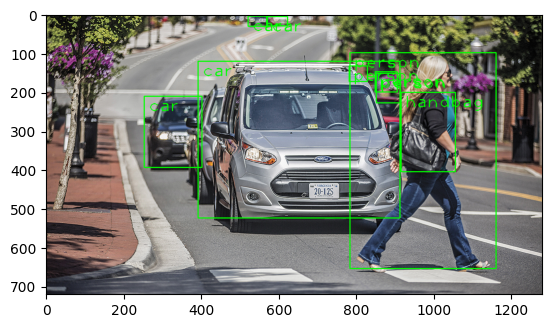

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
engine = pyttsx3.init()

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

fontScale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIds, confs, bbox = model.detect(frame, confThreshold=0.5)
    print(ClassIds)
    spoken_labels = set()
    if len(ClassIds) != 0:
        for classId, confidence, box in zip(ClassIds.flatten(), confs.flatten(), bbox):
            cv2.rectangle(frame, box, color=(0, 255, 0), thickness=2)
            if 0 <= classId - 1 < len(ClassNames):
                label = ClassNames[classId - 1]
            else:
                label = str(classId)
            cv2.putText(frame, label, (box[0] + 10, box[1] + 40), font, fontScale, (0, 255, 0), thickness=2)
            if label not in spoken_labels:
                engine.say(label)
                spoken_labels.add(label)
        engine.runAndWait()
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[23  1]
[23]
()
[23]
[23  1]
[1]
[17]
[23]
[1]
()
()
[1]
()
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[1]
[1]
[1]
[1]
[ 1 65]
[1]
